In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

predictions_path = r"../predictions.csv"
dataset_path = r"../../data/dataset_direction.csv"

In [2]:
df1 = pd.read_csv(dataset_path, encoding='latin-1')
#df1.head()

In [3]:
df2 = pd.read_csv(predictions_path, encoding='utf-8')
#df2.head()

In [4]:
df = df1.merge(df2, left_on='dir_filename', right_on='filename')
#df.head()

In [5]:
from sklearn.metrics import accuracy_score, f1_score
from metrics import map_at_k, mean_accuracy_at_k

def generate_report(dframe):

    last_pred_col = dframe.columns.get_loc('rank') - 1
    first_pred_col = dframe.columns.get_loc('p1')
    predictions = dframe.iloc[:, first_pred_col:last_pred_col]
    predictions = np.array(predictions)
    y = np.array(dframe["y"])

    predictions = np.array(predictions)
    accuracy = accuracy_score(y, predictions[:, 0])
    f1 = f1_score(y, predictions[:, 0], average='macro')
    #mAP_1 = map_at_k(y, predictions, 1)
    mAP_5 = map_at_k(y, predictions, 5)
    mAcc_5 = mean_accuracy_at_k(y, predictions, 5)
    print("Accuracy: ", accuracy, "\nmAcc@5: ", mAcc_5, "\nMAP@5: ", mAP_5,  "\nF1: ", f1)

    res_at_k = []
    k_max = predictions.shape[1] + 1
    ks = list(range(1, k_max))
    for k in ks:
        res = mean_accuracy_at_k(y, predictions, k)
        #print("MAP@", k, ": ", res)
        res_at_k.append(res)
        #TODO: Bruk rank

    plt.plot(ks, res_at_k)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.ylim(.1, 1.1)
    plt.show()

    print("AUC: ", np.sum(res_at_k)/k_max)

## Whole dataset

Accuracy:  0.40301724137931033 
mAcc@5:  0.5905172413793104 
MAP@5:  0.47363505747126433 
F1:  0.2873983739837398
AUC:  0.9836454450139794


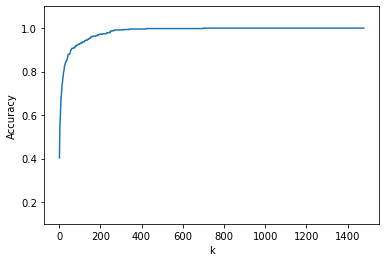

In [6]:
generate_report(df)


## Males

Accuracy:  0.3972602739726027 
mAcc@5:  0.593607305936073 
MAP@5:  0.47100456621004566 
F1:  0.2758241758241758
AUC:  0.984598296927064


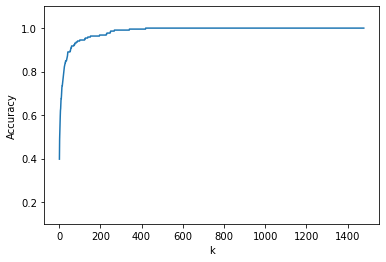

In [7]:
df_f = df[df["sex"] == "m"]
generate_report(df_f)

## Females

Accuracy:  0.40540540540540543 
mAcc@5:  0.5855855855855856 
MAP@5:  0.4731231231231231 
F1:  0.28771929824561404
AUC:  0.9858808132456782


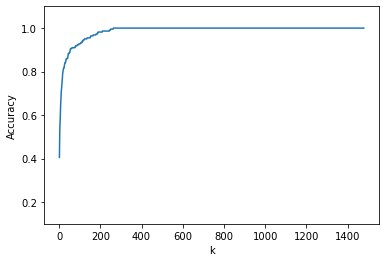

In [8]:
df_f = df[df["sex"] == "f"]
generate_report(df_f)

## 2020

Accuracy:  0.44672131147540983 
mAcc@5:  0.6311475409836066 
MAP@5:  0.5194672131147541 
F1:  0.31282051282051276
AUC:  0.9854092822330527


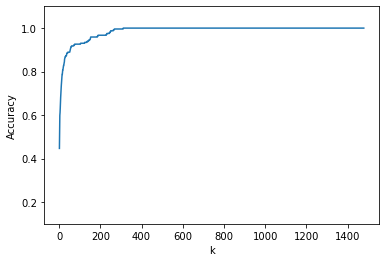

In [9]:
df_f = df[df["date"] >= "2020-01-01"]
generate_report(df_f)

## Females 2020

Accuracy:  0.4339622641509434 
mAcc@5:  0.5849056603773585 
MAP@5:  0.49150943396226415 
F1:  0.29504504504504503
AUC:  0.9851733809280978


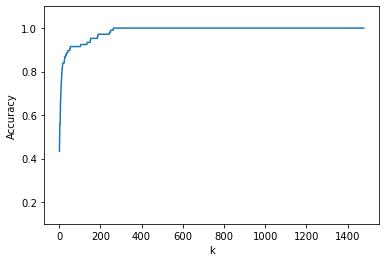

In [10]:
df_f = df[(df["sex"] == "f") & (df["date"] >= "2020-01-01")]
generate_report(df_f)

## Males 2020

Accuracy:  0.45161290322580644 
mAcc@5:  0.6612903225806451 
MAP@5:  0.535483870967742 
F1:  0.320040899795501
AUC:  0.9874455100261552


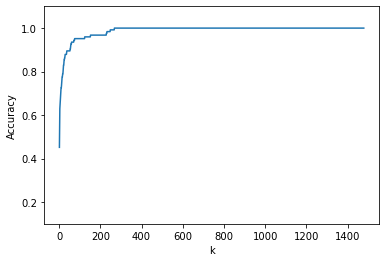

In [11]:
df_f = df[(df["sex"] == "m") & (df["date"] >= "2020-01-01")]
generate_report(df_f)

## Left

Accuracy:  0.42920353982300885 
mAcc@5:  0.584070796460177 
MAP@5:  0.4853244837758112 
F1:  0.30727272727272725
AUC:  0.9842740971059555


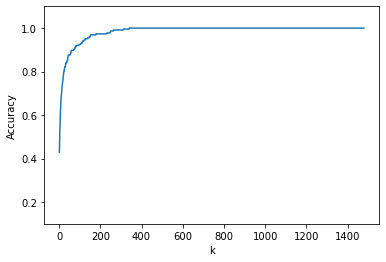

In [12]:
df_f = df[df["dir_filename"].str.contains('l')]
generate_report(df_f)

## Right

Accuracy:  0.37815126050420167 
mAcc@5:  0.5966386554621849 
MAP@5:  0.4625350140056022 
F1:  0.2695459579180509
AUC:  0.9830484896661368


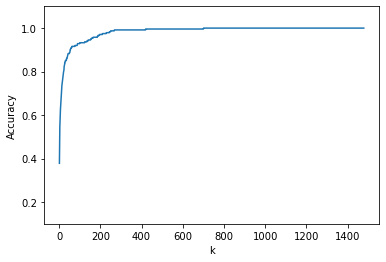

In [13]:
df_f = df[df["dir_filename"].str.contains('r')]
generate_report(df_f)

In [14]:
df_sorted = df.sort_values(by=['rank'])
easiest = df_sorted['new_filename'][:16].tolist()
hardest = df_sorted['new_filename'][-16:].tolist()


## Easiest

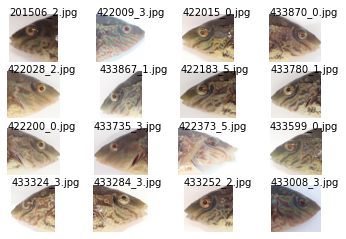

In [15]:
dir = os.path.join('..', '..', 'data', 'dataset', 'cropped_head')
paths = [os.path.join(dir, file) for file in easiest]
imgs = [mpimg.imread(path) for path in paths]

n = 4
fig, ax = plt.subplots(nrows=n, ncols=n)
[axi.set_axis_off() for axi in ax.ravel()]
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        ix = i*n+j
        col.imshow(imgs[ix])
        col.text(0, 0, os.path.basename(paths[ix]))
plt.savefig('easy.png', dpi=270)
plt.show()


## Hardest

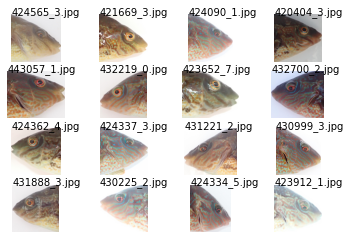

In [16]:
paths = [os.path.join(dir, file) for file in hardest]
imgs = [mpimg.imread(path) for path in paths]

n = 4
fig, ax = plt.subplots(nrows=n, ncols=n)
[axi.set_axis_off() for axi in ax.ravel()]
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        ix = i*n+j
        col.imshow(imgs[ix])
        col.text(0, 0, os.path.basename(paths[ix]))
plt.savefig('hard.png', dpi=270)
plt.show()

In [17]:
ranks = df_sorted['rank'].to_numpy()
unique, counts = np.unique(ranks, return_counts=True)
rank_dict = dict(zip(unique, counts))
rank_dict

{1: 187,
 2: 39,
 3: 23,
 4: 12,
 5: 13,
 6: 15,
 7: 7,
 8: 10,
 9: 10,
 10: 3,
 11: 6,
 12: 7,
 13: 5,
 14: 6,
 15: 2,
 16: 5,
 17: 5,
 18: 2,
 19: 5,
 20: 4,
 21: 4,
 22: 1,
 23: 2,
 24: 4,
 25: 3,
 26: 3,
 27: 2,
 28: 1,
 29: 2,
 31: 2,
 32: 2,
 33: 1,
 36: 2,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 2,
 42: 4,
 43: 2,
 44: 1,
 49: 1,
 52: 1,
 53: 2,
 54: 1,
 55: 2,
 56: 1,
 57: 1,
 58: 1,
 60: 2,
 62: 1,
 71: 1,
 75: 1,
 77: 2,
 80: 1,
 83: 1,
 88: 1,
 89: 1,
 96: 1,
 100: 1,
 104: 1,
 110: 1,
 113: 1,
 117: 1,
 123: 1,
 124: 1,
 127: 1,
 135: 1,
 139: 1,
 141: 1,
 146: 1,
 151: 1,
 152: 1,
 153: 1,
 157: 1,
 165: 1,
 179: 1,
 186: 1,
 189: 1,
 196: 1,
 210: 1,
 229: 1,
 232: 1,
 244: 1,
 248: 1,
 250: 2,
 263: 1,
 268: 1,
 311: 1,
 341: 1,
 420: 1,
 701: 1}